In [380]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from pythermalcomfort.models import pmv
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [381]:
df = pd.read_csv("cleaned_data.csv")
df.drop(['Unnamed: 0'],axis=1)

,ITEMP,IRH,IAV,IMRT,CCSP,CHSP,OTEMP,ORH,OAV,YEAR,MONTH,DAY,PMV
0,24.584695,63.517,0.030988,24.584695,18.333333,26.666667,23.0,89,1.34112,2012,7,4,-0.270899
1,24.584695,63.704,0.030988,24.584695,18.333333,26.666667,23.0,89,1.34112,2012,7,4,-0.269505
2,24.584695,63.856,0.030988,24.584695,18.333333,26.666667,23.0,89,1.34112,2012,7,4,-0.268373
3,24.584695,64.039,0.030988,24.584695,18.333333,26.666667,23.0,89,0.89408,2012,7,4,-0.267009
4,24.498384,64.282,0.030988,24.498384,18.333333,26.666667,23.0,89,0.89408,2012,7,4,-0.297025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619771,23.593889,55.626,0.030988,23.593889,18.333333,26.666667,17.0,72,1.34112,2012,9,4,-0.537396
619772,23.775000,55.626,0.030988,23.775000,18.333333,26.666667,17.0,72,1.34112,2012,9,4,-0.474448
619773,23.775000,55.626,0.030988,23.775000,18.333333,26.666667,17.0,72,1.34112,2012,9,4,-0.474448
619774,23.775000,55.626,0.030988,23.775000,18.333333,26.666667,16.0,77,1.34112,2012,9,4,-0.474448


In [14]:
X = df[['CCSP','CHSP','OTEMP','ORH','OAV','YEAR','MONTH','DAY']]
y = df['PMV']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=20)
x_test = scaler_all.transform(x_test)

In [5]:
# y_test

In [130]:
from ladybug_comfort import pmv as lpmv

### D - All

In [303]:
X_all = df[['CCSP','CHSP','OTEMP','ORH','OAV','YEAR','MONTH','DAY']]
y_all = df[['ITEMP','IRH','IMRT','PMV']]
split_ = int(len(X_all)*0.8)
x_train_all, x_test_all = X_all[:split_], X_all[split_:]
y_train_all, y_test_all = y_all[:split_], y_all[split_:]

In [304]:
y_all.drop(['PMV'],axis=1)

,ITEMP,IRH,IMRT
0,24.584695,0.030988,24.584695
1,24.584695,0.030988,24.584695
2,24.584695,0.030988,24.584695
3,24.584695,0.030988,24.584695
4,24.498384,0.030988,24.498384
...,...,...,...
619771,23.593889,0.030988,23.593889
619772,23.775000,0.030988,23.775000
619773,23.775000,0.030988,23.775000
619774,23.775000,0.030988,23.775000


In [305]:
from sklearn.preprocessing import StandardScaler
scaler_all = StandardScaler()
scaler_all.fit(x_train_all)

StandardScaler()

In [306]:
x_train_all = scaler_all.transform(x_train_all)
x_test_all = scaler_all.transform(x_test_all)

In [307]:
model_all = Sequential()
model_all.add(Dense(300,input_dim=8,activation='relu'))
for i in range(10):
    model_all.add(Dense(300,activation='relu'))

In [308]:
model_all.add(Dense(3,activation='linear'))
model_all.compile(loss='mean_absolute_error',optimizer='adam',metrics='mae')
model_all.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_139 (Dense)           (None, 300)               2700      
                                                                 
 dense_140 (Dense)           (None, 300)               90300     
                                                                 
 dense_141 (Dense)           (None, 300)               90300     
                                                                 
 dense_142 (Dense)           (None, 300)               90300     
                                                                 
 dense_143 (Dense)           (None, 300)               90300     
                                                                 
 dense_144 (Dense)           (None, 300)               90300     
                                                                 
 dense_145 (Dense)           (None, 300)             

In [309]:
history_all = model_all.fit(x_train_all,y_train_all.drop(['PMV'],axis=1),validation_split=0.2,epochs=10)

Epoch 1/10
12396/12396 [==============================] - 245s 20ms/step - loss: 0.7008 - mae: 0.7008 - val_loss: 0.7416 - val_mae: 0.7416
Epoch 2/10
12396/12396 [==============================] - 247s 20ms/step - loss: 0.5910 - mae: 0.5910 - val_loss: 0.7779 - val_mae: 0.7779
Epoch 3/10
12396/12396 [==============================] - 256s 21ms/step - loss: 0.5652 - mae: 0.5652 - val_loss: 0.7734 - val_mae: 0.7734
Epoch 4/10
12396/12396 [==============================] - 156s 13ms/step - loss: 0.5476 - mae: 0.5476 - val_loss: 0.7536 - val_mae: 0.7536
Epoch 5/10
12396/12396 [==============================] - 179s 14ms/step - loss: 0.5349 - mae: 0.5349 - val_loss: 0.7940 - val_mae: 0.7940
Epoch 6/10
12396/12396 [==============================] - 166s 13ms/step - loss: 0.5231 - mae: 0.5231 - val_loss: 0.7344 - val_mae: 0.7344
Epoch 7/10
12396/12396 [==============================] - 173s 14ms/step - loss: 0.5145 - mae: 0.5145 - val_loss: 0.7678 - val_mae: 0.7678
Epoch 8/10
12396/12396 [===

In [310]:
predictions = model_all.predict(x_test_all)

3874/3874 [==============================] - 20s 5ms/step


In [311]:
predictions

array([[2.2868227e+01, 2.1736881e-02, 2.2880722e+01],
       [2.2868227e+01, 2.1736881e-02, 2.2880722e+01],
       [2.2868227e+01, 2.1736881e-02, 2.2880722e+01],
       ...,
       [2.3220135e+01, 2.2049431e-02, 2.3234314e+01],
       [2.3178722e+01, 2.2018626e-02, 2.3192734e+01],
       [2.3178722e+01, 2.2018626e-02, 2.3192734e+01]], dtype=float32)

In [312]:
y_test_all

,ITEMP,IRH,IMRT,PMV
495820,23.668889,0.026924,23.668889,-0.809982
495821,23.742222,0.026924,23.742222,-0.765233
495822,23.813889,0.026924,23.813889,-0.760434
495823,23.886111,0.026924,23.886111,-0.734566
495824,23.910000,0.026924,23.910000,-0.725934
...,...,...,...,...
619771,23.593889,0.030988,23.593889,-0.537396
619772,23.775000,0.030988,23.775000,-0.474448
619773,23.775000,0.030988,23.775000,-0.474448
619774,23.775000,0.030988,23.775000,-0.474448


In [361]:
# pass all three value into the PMV calculator
import numpy as np
count_=0
mae = 0
mse = 0
r2__score = 0
pmv_list = []
for idx,prediction in enumerate(predictions): 
    count_+=1
    pmv_predicted2= lpmv.predicted_mean_vote_no_set(ta=prediction[0],tr=prediction[2],vel=0.1,rh=prediction[1],met=1.2,clo=0.43),
    pmv_list.append(pmv_predicted2[0]['pmv']) 

r2__score = r2_score(y_test_all['PMV'],pmv_list)
mae = mean_absolute_error(y_test_all['PMV'],pmv_list)
mse = mean_squared_error(y_test_all['PMV'],pmv_list)
print(f"r2_score:{r2__score}")
print(f"mae:{mae}")
print(f"mse: {mse}")

r2_score:-0.875885720274475
mae:0.549342419262404
mse: 0.46456469906958003


In [357]:
pmv_list

[-1.2089137040924738,
 -1.3955197074960302,
 -1.1495736889924366,
 -1.8425295204564391,
 -0.6827084851361308,
 -2.06526187621293,
 -1.4308523331249992,
 -1.51177219690467,
 -0.7872048450491462,
 -0.4958540074011643,
 -1.3940229714310914,
 -0.959408179273123,
 -2.0131985862533974,
 -1.2196115934017757,
 -1.0044917287744572,
 -1.0192353954616227,
 -0.3977973120095775,
 -1.9453697321595609,
 -0.5867124748537207,
 -1.3391754443172104,
 -1.6489747855293282,
 -1.110302483639924,
 -1.299626729718001,
 -0.783726033881593,
 -1.2579390919052857,
 -0.9137277235903964,
 -0.902293804210342,
 -1.0847418592199327,
 -1.1433050652149892,
 -0.8808536860667093,
 -1.4423910487695526,
 -1.0096104970157984,
 -0.5201534918724945,
 -1.9566404045495385,
 -1.3924006760820486,
 -1.856867511359978,
 -1.1177699001964692,
 -0.9917147380778057,
 -0.9406386173975307,
 -1.471150290173924,
 -0.8395506740048584,
 -1.831519920340608,
 -0.6406199430986173,
 -1.0566784487868979,
 -2.121400314311896,
 -1.1834362392587536,
 

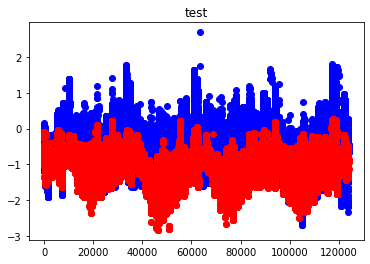

In [362]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return




plotGraph(y_test_all['PMV'],pmv_list,"test")

###  D - TH

In [340]:
X_TH = df[['CCSP','CHSP','OTEMP','ORH','OAV','YEAR','MONTH','DAY']]
y_TH = df[['ITEMP','IRH','PMV']]
x_train_TH, x_test_TH, y_train_TH, y_test_TH = train_test_split(X_TH,y_TH,test_size=0.2,random_state=20)

In [341]:
avg_mrt_th=(x_test_TH['CCSP']+x_test_TH['CHSP'])/2
avg_mrt_th = avg_mrt_th.values
avg_mrt

array([22.5      , 22.5      , 21.7777775, ..., 24.166667 , 22.5      ,
       22.5      ])

In [342]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_TH)

StandardScaler()

In [343]:
x_train_TH = scaler.transform(x_train_TH)
x_test_TH = scaler.transform(x_test_TH)

In [35]:
model_TH = Sequential()
for i in range(10):
    model_TH.add(Dense(300,input_dim=8,activation='relu'))

In [36]:
model_TH.add(Dense(2,activation='linear'))
model_TH.compile(loss='mean_absolute_error',optimizer='adam',metrics='mae')
model_TH.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 300)               2700      
                                                                 
 dense_12 (Dense)            (None, 300)               90300     
                                                                 
 dense_13 (Dense)            (None, 300)               90300     
                                                                 
 dense_14 (Dense)            (None, 300)               90300     
                                                                 
 dense_15 (Dense)            (None, 300)               90300     
                                                                 
 dense_16 (Dense)            (None, 300)               90300     
                                                                 
 dense_17 (Dense)            (None, 300)              

In [37]:
history_TH = model_TH.fit(x_train_TH,y_train_TH,validation_split=0.2,epochs=10)

Epoch 1/10
12396/12396 [==============================] - 153s 12ms/step - loss: 0.5397 - mae: 0.5397 - val_loss: 0.4665 - val_mae: 0.4665
Epoch 2/10
12396/12396 [==============================] - 148s 12ms/step - loss: 0.4637 - mae: 0.4637 - val_loss: 0.4428 - val_mae: 0.4428
Epoch 3/10
12396/12396 [==============================] - 155s 13ms/step - loss: 0.4419 - mae: 0.4419 - val_loss: 0.4277 - val_mae: 0.4277
Epoch 4/10
12396/12396 [==============================] - 154s 12ms/step - loss: 0.4287 - mae: 0.4287 - val_loss: 0.4406 - val_mae: 0.4406
Epoch 5/10
12396/12396 [==============================] - 155s 13ms/step - loss: 0.4186 - mae: 0.4186 - val_loss: 0.4075 - val_mae: 0.4075
Epoch 6/10
12396/12396 [==============================] - 155s 12ms/step - loss: 0.4104 - mae: 0.4104 - val_loss: 0.4130 - val_mae: 0.4130
Epoch 7/10
12396/12396 [==============================] - 157s 13ms/step - loss: 0.4039 - mae: 0.4039 - val_loss: 0.3973 - val_mae: 0.3973
Epoch 8/10
12396/12396 [===

In [344]:
predictions_th = model_TH.predict(x_test_TH)
predictions_th

3874/3874 [==============================] - 26s 7ms/step


array([[22.08342   ,  0.02808942],
       [21.014349  ,  0.02726939],
       [23.051702  ,  0.02887291],
       ...,
       [23.128777  ,  0.02892899],
       [20.620884  ,  0.02717341],
       [24.081474  ,  0.02962256]], dtype=float32)

In [363]:
# pass all three value into the PMV calculator
import numpy as np
count_=0
r2__score = 0
mae = 0
mse = 0
pmv_list = []
for idx,prediction_th in enumerate(predictions_th): 
    count_+=1
    pmv_predicted2= lpmv.predicted_mean_vote_no_set(ta=prediction_th[0],tr=avg_mrt_th[idx],vel=0.1,rh=prediction_th[1],met=1.2,clo=0.43),
    pmv_list.append(pmv_predicted2[0]['pmv']) 

r2__score = r2_score(y_test_TH['PMV'],pmv_list)
mae = mean_absolute_error(y_test_TH['PMV'],pmv_list)
mse = mean_squared_error(y_test_TH['PMV'],pmv_list)
print(f"r2_score:{r2__score}")
print(f"mae:{mae}")
print(f"mse:{mse}")

r2_score:-1.2696190328274417
mae:0.710410175753577
mse:0.7045067757192263


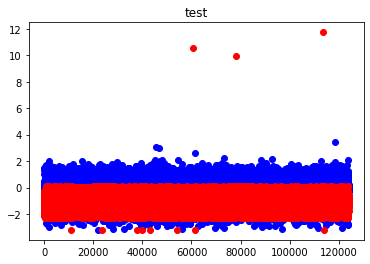

In [364]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return




plotGraph(y_test_TH['PMV'],pmv_list,"test")

###  D - TM

In [238]:
X_TM = df[['CCSP','CHSP','OTEMP','ORH','OAV','YEAR','MONTH','DAY']]
y_TM = df[['ITEMP','IMRT','PMV']]
x_train_TM, x_test_TM, y_train_TM, y_test_TM = train_test_split(X_TM,y_TM,test_size=0.2,random_state=20)

In [239]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_TM)

StandardScaler()

In [240]:
x_train_TM = scaler.transform(x_train_TM)
x_test_TM = scaler.transform(x_test_TM)

In [47]:
model_TM = Sequential()
for i in range(10):
    model_TM.add(Dense(300,input_dim=8,activation='relu'))

In [48]:
model_TM.add(Dense(2,activation='linear'))
model_TM.compile(loss='mean_absolute_error',optimizer='adam',metrics='mae')
model_TM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 300)               2700      
                                                                 
 dense_23 (Dense)            (None, 300)               90300     
                                                                 
 dense_24 (Dense)            (None, 300)               90300     
                                                                 
 dense_25 (Dense)            (None, 300)               90300     
                                                                 
 dense_26 (Dense)            (None, 300)               90300     
                                                                 
 dense_27 (Dense)            (None, 300)               90300     
                                                                 
 dense_28 (Dense)            (None, 300)              

In [49]:
history_TM = model_TM.fit(x_train_TM,y_train_TM.drop(['PMV'],axis=1),validation_split=0.2,epochs=10)

Epoch 1/10
12396/12396 [==============================] - 162s 13ms/step - loss: 1.0476 - mae: 1.0476 - val_loss: 0.9544 - val_mae: 0.9544
Epoch 2/10
12396/12396 [==============================] - 181s 15ms/step - loss: 0.9224 - mae: 0.9224 - val_loss: 0.8668 - val_mae: 0.8668
Epoch 3/10
12396/12396 [==============================] - 177s 14ms/step - loss: 0.8849 - mae: 0.8849 - val_loss: 0.8446 - val_mae: 0.8446
Epoch 4/10
12396/12396 [==============================] - 176s 14ms/step - loss: 0.8578 - mae: 0.8578 - val_loss: 0.8516 - val_mae: 0.8516
Epoch 5/10
12396/12396 [==============================] - 177s 14ms/step - loss: 0.8352 - mae: 0.8352 - val_loss: 0.8303 - val_mae: 0.8303
Epoch 6/10
12396/12396 [==============================] - 178s 14ms/step - loss: 0.8173 - mae: 0.8173 - val_loss: 0.8287 - val_mae: 0.8287
Epoch 7/10
12396/12396 [==============================] - 129s 10ms/step - loss: 0.8043 - mae: 0.8043 - val_loss: 0.7932 - val_mae: 0.7932
Epoch 8/10
12396/12396 [===

In [235]:
predictions_tm = model_TM.predict(x_test_TM)

3874/3874 [==============================] - 31s 8ms/step


In [365]:
# mae
count_=0
mae = 0
r2__score = 0
mse = 0
pmv_list = []
for idx,prediction_tm in enumerate(predictions_tm): 
    count_+=1
#     print(f"count_: {count_}") 
#     print(mrt)
#     pmv_predicted = pmv(tdb=prediction_tm[0],tr=prediction_tm[1],rh=50,vr=0.1,met=1.2,clo=0.43)
    pmv_predicted2= lpmv.predicted_mean_vote_no_set(ta=prediction_tm[0],tr=prediction_tm[1],vel=0.1,rh=50,met=1.2,clo=0.43),
    pmv_list.append(pmv_predicted2[0]['pmv']) 
#     pmv_list.append(pmv_predicted)
#     print(pmv_predicted)
    
#         print(pmv_predicted)
        
r2__score = r2_score(y_test_TM['PMV'],pmv_list)    
mae = mean_absolute_error(y_test_TM['PMV'],pmv_list)
mse = mean_squared_error(y_test_TM['PMV'],pmv_list)
print(f"mae: {mae}")
print(f'r2_score: {r2__score}')
print(f"mse: {mse}")

mae: 0.4557539336226708
r2_score: -0.03556562057668877
mse: 0.3214473380095376


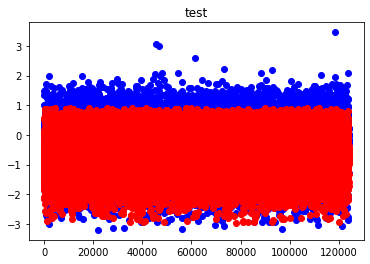

In [366]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return




plotGraph(y_test_TM['PMV'],pmv_list,"test")

###  D - HM

In [243]:
X_HM = df[['CCSP','CHSP','OTEMP','ORH','OAV','YEAR','MONTH','DAY']]
y_HM = df[['IMRT','IRH','PMV']]
x_train_HM, x_test_HM, y_train_HM, y_test_HM = train_test_split(X_HM,y_HM,test_size=0.2,random_state=20)

In [249]:
avg_t_hm=(x_test_HM['CCSP']+x_test_HM['CHSP'])/2
avg_t_hm = avg_t_hm.values
avg_t_hm

array([22.5      , 22.5      , 21.7777775, ..., 24.166667 , 22.5      ,
       22.5      ])

In [250]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_HM)

StandardScaler()

In [251]:
x_train_HM = scaler.transform(x_train_HM)
x_test_HM = scaler.transform(x_test_HM)

In [56]:
model_HM = Sequential()
for i in range(10):
    model_HM.add(Dense(300,input_dim=8,activation='relu'))

In [57]:
model_HM.add(Dense(2,activation='linear'))
model_HM.compile(loss='mean_absolute_error',optimizer='adam',metrics='mae')
model_HM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 300)               2700      
                                                                 
 dense_34 (Dense)            (None, 300)               90300     
                                                                 
 dense_35 (Dense)            (None, 300)               90300     
                                                                 
 dense_36 (Dense)            (None, 300)               90300     
                                                                 
 dense_37 (Dense)            (None, 300)               90300     
                                                                 
 dense_38 (Dense)            (None, 300)               90300     
                                                                 
 dense_39 (Dense)            (None, 300)              

In [58]:
history_HM = model_HM.fit(x_train_HM,y_train_HM.drop(['PMV'],axis=1),validation_split=0.2,epochs=10)

Epoch 1/10
12396/12396 [==============================] - 153s 12ms/step - loss: 0.5442 - mae: 0.5442 - val_loss: 0.5766 - val_mae: 0.5766
Epoch 2/10
12396/12396 [==============================] - 159s 13ms/step - loss: 0.4687 - mae: 0.4687 - val_loss: 0.4459 - val_mae: 0.4459
Epoch 3/10
12396/12396 [==============================] - 161s 13ms/step - loss: 0.4482 - mae: 0.4482 - val_loss: 0.4355 - val_mae: 0.4355
Epoch 4/10
12396/12396 [==============================] - 160s 13ms/step - loss: 0.4341 - mae: 0.4341 - val_loss: 0.4236 - val_mae: 0.4236
Epoch 5/10
12396/12396 [==============================] - 635s 51ms/step - loss: 0.4226 - mae: 0.4226 - val_loss: 0.4225 - val_mae: 0.4225
Epoch 6/10
12396/12396 [==============================] - 102s 8ms/step - loss: 0.4145 - mae: 0.4145 - val_loss: 0.4113 - val_mae: 0.4113
Epoch 7/10
12396/12396 [==============================] - 106s 9ms/step - loss: 0.4079 - mae: 0.4079 - val_loss: 0.4085 - val_mae: 0.4085
Epoch 8/10
12396/12396 [=====

In [252]:
predictions_hm = model_HM.predict(x_test_HM)

3874/3874 [==============================] - 28s 7ms/step


In [367]:
count_ = 0
r2__score = 0
mae = 0
mse = 0
pmv_list = []
for idx,prediction_hm in enumerate(predictions_hm): 
    count_+=1
#     print(f"count_: {count_}") 
#     print(mrt)
#     pmv_predicted = pmv(tdb=c[idx],tr=prediction_hm[0],rh=prediction_hm[1],vr=0.1,met=1.2,clo=0.43)
    pmv_predicted2= lpmv.predicted_mean_vote_no_set(ta=avg_t_hm[idx],tr=prediction_hm[0],vel=0.1,rh=prediction_hm[1],met=1.2,clo=0.43),
    pmv_list.append(pmv_predicted2[0]['pmv']) 
#     pmv_list.append(pmv_predicted)
#     print(pmv_predicted)
    
#         print(pmv_predicted)
        
r2__score = r2_score(y_test_HM['PMV'],pmv_list)    
mae = mean_absolute_error(y_test_HM['PMV'],pmv_list)
mse = mean_squared_error(y_test_HM['PMV'],pmv_list)
print(f'r2_score: {r2__score}')
print(f"mae: {mae}")
print(f"mse: {mse}")

r2_score: -1.6410305064569717
mae: 0.7672681471046503
mse: 0.8197956836668715


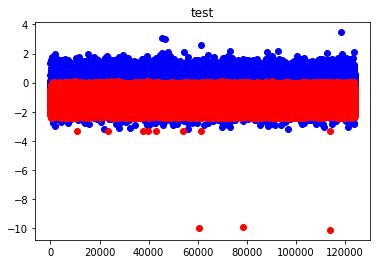

In [368]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return




plotGraph(y_test_HM['PMV'],pmv_list,"test")

### D-T 

In [290]:
X_T = df[['CCSP','CHSP','OTEMP','ORH','OAV','YEAR','MONTH','DAY']]
y_T = df[['ITEMP','PMV']]
x_train_T, x_test_T, y_train_T, y_test_T = train_test_split(X_T,y_T,test_size=0.2,random_state=20)

In [291]:
avg_t_t=(x_test_T['CCSP']+x_test_T['CHSP'])/2
avg_t_t = avg_t_t.values
avg_t_t

array([22.5      , 22.5      , 21.7777775, ..., 24.166667 , 22.5      ,
       22.5      ])

In [292]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_T)

StandardScaler()

array([22.5      , 22.5      , 21.7777775, ..., 24.166667 , 22.5      ,
       22.5      ])

In [293]:
x_train_T = scaler.transform(x_train_T)
x_test_T = scaler.transform(x_test_T)

In [65]:
model_T = Sequential()
for i in range(10):
    model_T.add(Dense(300,input_dim=8,activation='relu'))

In [66]:
model_T.add(Dense(2,activation='linear'))
model_T.compile(loss='mean_absolute_error',optimizer='adam',metrics='mae')
model_T.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 300)               2700      
                                                                 
 dense_45 (Dense)            (None, 300)               90300     
                                                                 
 dense_46 (Dense)            (None, 300)               90300     
                                                                 
 dense_47 (Dense)            (None, 300)               90300     
                                                                 
 dense_48 (Dense)            (None, 300)               90300     
                                                                 
 dense_49 (Dense)            (None, 300)               90300     
                                                                 
 dense_50 (Dense)            (None, 300)              

In [67]:
history_T = model_T.fit(x_train_T,y_train_T.drop(['PMV'],axis=1),validation_split=0.2,epochs=10)

Epoch 1/10
12396/12396 [==============================] - 142s 11ms/step - loss: 1.0519 - mae: 1.0519 - val_loss: 0.8988 - val_mae: 0.8988
Epoch 2/10
12396/12396 [==============================] - 138s 11ms/step - loss: 0.9233 - mae: 0.9233 - val_loss: 0.8712 - val_mae: 0.8712
Epoch 3/10
12396/12396 [==============================] - 142s 11ms/step - loss: 0.8866 - mae: 0.8866 - val_loss: 0.8746 - val_mae: 0.8746
Epoch 4/10
12396/12396 [==============================] - 150s 12ms/step - loss: 0.8613 - mae: 0.8613 - val_loss: 0.8336 - val_mae: 0.8336
Epoch 5/10
12396/12396 [==============================] - 151s 12ms/step - loss: 0.8389 - mae: 0.8389 - val_loss: 0.8122 - val_mae: 0.8122
Epoch 6/10
12396/12396 [==============================] - 146s 12ms/step - loss: 0.8218 - mae: 0.8218 - val_loss: 0.8240 - val_mae: 0.8240
Epoch 7/10
12396/12396 [==============================] - 152s 12ms/step - loss: 0.8070 - mae: 0.8070 - val_loss: 0.7984 - val_mae: 0.7984
Epoch 8/10
12396/12396 [===

In [294]:
predictions_t = model_T.predict(x_test_T)

3874/3874 [==============================] - 26s 7ms/step


In [369]:
count_=0
r2__score = 0
mae = 0
mse = 0
pmv_list = []
for idx,prediction_t in enumerate(predictions_t): 
    count_+=1
#     print(f"count_: {count_}") 
#     print(mrt)
#     pmv_predicted = pmv(tdb=prediction_t[0],tr=c[idx],rh=50,vr=0.1,met=1.2,clo=0.43)
    pmv_predicted2= lpmv.predicted_mean_vote_no_set(ta=prediction_t[0],tr=avg_t_t[idx],vel=0.1,rh=50,met=1.2,clo=0.43),
    pmv_list.append(pmv_predicted2[0]['pmv']) 
#     pmv_list.append(pmv_predicted)
#     print(pmv_predicted)
    
#         print(pmv_predicted)
        
r2__score = r2_score(y_test_T['PMV'],pmv_list)    
mae = mean_absolute_error(y_test_T['PMV'],pmv_list)
mse = mean_squared_error(y_test_T['PMV'],pmv_list)
print(f'r2_score: {r2__score}')
print(f"mae: {mae}")
print(f"mse: {mse}")
#     pmv_list.append(pmv_predicted)
#     print(pmv_predicted)


r2_score: -0.37964467452495976
mae: 0.5271842803285979
mse: 0.4282520578252831


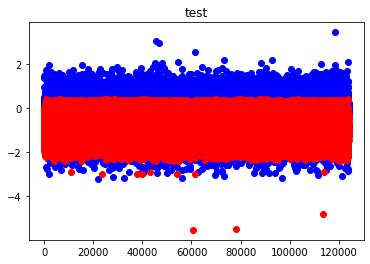

In [370]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return




plotGraph(y_test_T['PMV'],pmv_list,"test")

### D-H

In [263]:
X_H = df[['CCSP','CHSP','OTEMP','ORH','OAV','YEAR','MONTH','DAY']]
y_H = df[['IRH','PMV']]
x_train_H, x_test_H, y_train_H, y_test_H = train_test_split(X_T,y_T,test_size=0.2,random_state=20)

In [264]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_H)

StandardScaler()

In [265]:
x_train_scaled = scaler.transform(x_train_H)
x_test_scaled = scaler.transform(x_test_H)

In [271]:
avg_t_h=(x_test_H['CCSP']+x_test_H['CHSP'])/2
avg_t_h = avg_t_h.values
avg_t_h

array([22.5      , 22.5      , 21.7777775, ..., 24.166667 , 22.5      ,
       22.5      ])

In [74]:
model_H = Sequential()
for i in range(10):
    model_H.add(Dense(300,input_dim=8,activation='relu'))

In [75]:
model_H.add(Dense(2,activation='linear'))
model_H.compile(loss='mean_absolute_error',optimizer='adam',metrics='mae')
model_H.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 300)               2700      
                                                                 
 dense_56 (Dense)            (None, 300)               90300     
                                                                 
 dense_57 (Dense)            (None, 300)               90300     
                                                                 
 dense_58 (Dense)            (None, 300)               90300     
                                                                 
 dense_59 (Dense)            (None, 300)               90300     
                                                                 
 dense_60 (Dense)            (None, 300)               90300     
                                                                 
 dense_61 (Dense)            (None, 300)              

In [76]:
history_H = model_H.fit(x_train_H,y_train_H.drop(['PMV'],axis=1),validation_split=0.2,epochs=10)

Epoch 1/10
12396/12396 [==============================] - 160s 13ms/step - loss: 1.2468 - mae: 1.2468 - val_loss: 1.3391 - val_mae: 1.3391
Epoch 2/10
12396/12396 [==============================] - 158s 13ms/step - loss: 1.0957 - mae: 1.0957 - val_loss: 1.0203 - val_mae: 1.0203
Epoch 3/10
12396/12396 [==============================] - 159s 13ms/step - loss: 1.0496 - mae: 1.0496 - val_loss: 1.0881 - val_mae: 1.0881
Epoch 4/10
12396/12396 [==============================] - 169s 14ms/step - loss: 1.0385 - mae: 1.0385 - val_loss: 1.0011 - val_mae: 1.0011
Epoch 5/10
12396/12396 [==============================] - 170s 14ms/step - loss: 1.0286 - mae: 1.0286 - val_loss: 1.0501 - val_mae: 1.0501
Epoch 6/10
12396/12396 [==============================] - 169s 14ms/step - loss: 1.0284 - mae: 1.0284 - val_loss: 1.0027 - val_mae: 1.0027
Epoch 7/10
12396/12396 [==============================] - 173s 14ms/step - loss: 1.0192 - mae: 1.0192 - val_loss: 1.0049 - val_mae: 1.0049
Epoch 8/10
12396/12396 [===

In [77]:
predictions_t = model_H.predict(x_test_H)

1937/1937 [==============================] - 13s 7ms/step


In [371]:
count_=0
r2__score = 0
mae = 0
mse=0
pmv_list = []
for idx,prediction_t in enumerate(predictions_t): 
    count_+=1
#     print(f"count_: {count_}") 
#     print(mrt)
#     pmv_predicted = pmv(tdb=c[idx],tr=c[idx],rh=prediction_t[0],vr=0.1,met=1.2,clo=0.43)
#     pmv_list.append(pmv_predicted)
#     print(pmv_predicted)
    pmv_predicted2= lpmv.predicted_mean_vote_no_set(ta=avg_t_h[idx],tr=avg_t_h[idx],vel=0.1,rh=prediction_t[0],met=1.2,clo=0.43),
    pmv_list.append(pmv_predicted2[0]['pmv']) 
#     pmv_list.append(pmv_predicted)
#     print(pmv_predicted)
    
#         print(pmv_predicted)
        
r2__score = r2_score(y_test_H['PMV'],pmv_list)    
mae = mean_absolute_error(y_test_H['PMV'],pmv_list)
mse = mean_squared_error(y_test_H['PMV'],pmv_list)
print(f'r2_score: {r2__score}')
print(f"mae: {mae}")
print(f"mse: {mse}")
    

r2_score: -2.428130230340026
mae: 0.7948630645811523
mse: 1.0641173432149669


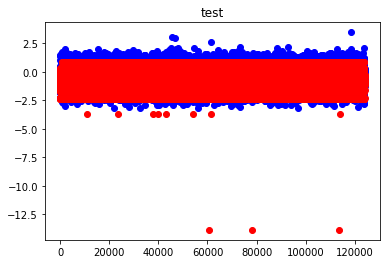

In [372]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return




plotGraph(y_test_H['PMV'],pmv_list,"test")

### D - M

In [296]:
X_M = df[['CCSP','CHSP','OTEMP','ORH','OAV','YEAR','MONTH','DAY']]
y_M = df[['IMRT','PMV']]
x_train_M, x_test_M, y_train_M, y_test_M = train_test_split(X_M,y_M,test_size=0.2,random_state=20)

In [297]:
avg_t_m=(x_test_M['CCSP']+x_test_M['CHSP'])/2
avg_t_m = avg_t_m.values
avg_t_m

array([22.5      , 22.5      , 21.7777775, ..., 24.166667 , 22.5      ,
       22.5      ])

In [298]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train_M)

StandardScaler()

array([22.5      , 22.5      , 21.7777775, ..., 24.166667 , 22.5      ,
       22.5      ])

In [321]:
x_train_scaled = scaler.transform(x_train_M)
x_test_M = scaler.transform(x_test_M)

array([22.5      , 22.5      , 21.7777775, ..., 24.166667 , 22.5      ,
       22.5      ])

In [83]:
model_M = Sequential()
for i in range(10):
    model_M.add(Dense(300,input_dim=8,activation='relu'))

In [84]:
model_M.add(Dense(2,activation='linear'))
model_M.compile(loss='mean_absolute_error',optimizer='adam',metrics='mae')
model_M.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 300)               2700      
                                                                 
 dense_67 (Dense)            (None, 300)               90300     
                                                                 
 dense_68 (Dense)            (None, 300)               90300     
                                                                 
 dense_69 (Dense)            (None, 300)               90300     
                                                                 
 dense_70 (Dense)            (None, 300)               90300     
                                                                 
 dense_71 (Dense)            (None, 300)               90300     
                                                                 
 dense_72 (Dense)            (None, 300)              

In [85]:
history_M = model_M.fit(x_train_scaled,y_train_M.drop(['PMV'],axis=1),validation_split=0.2,epochs=10)

Epoch 1/10
12396/12396 [==============================] - 175s 14ms/step - loss: 1.0642 - mae: 1.0642 - val_loss: 0.9065 - val_mae: 0.9065
Epoch 2/10
12396/12396 [==============================] - 173s 14ms/step - loss: 0.9276 - mae: 0.9276 - val_loss: 0.9455 - val_mae: 0.9455
Epoch 3/10
12396/12396 [==============================] - 171s 14ms/step - loss: 0.8930 - mae: 0.8930 - val_loss: 0.8537 - val_mae: 0.8537
Epoch 4/10
12396/12396 [==============================] - 177s 14ms/step - loss: 0.8694 - mae: 0.8694 - val_loss: 0.8484 - val_mae: 0.8484
Epoch 5/10
12396/12396 [==============================] - 177s 14ms/step - loss: 0.8491 - mae: 0.8491 - val_loss: 0.8332 - val_mae: 0.8332
Epoch 6/10
12396/12396 [==============================] - 181s 15ms/step - loss: 0.8322 - mae: 0.8322 - val_loss: 0.8340 - val_mae: 0.8340
Epoch 7/10
12396/12396 [==============================] - 178s 14ms/step - loss: 0.8168 - mae: 0.8168 - val_loss: 0.7983 - val_mae: 0.7983
Epoch 8/10
12396/12396 [===

In [323]:
print(x_test_M)
predictions_m = model_M.predict(x_test_M)

[[-0.16091729  0.81347305 -1.10633285 ...  0.89169639 -1.04599048
   0.        ]
 [-0.16091729  0.81347305 -0.42269249 ... -1.12145795  1.34257247
   0.        ]
 [ 0.438112   -1.76727536  1.72589151 ...  0.89169639 -0.44884974
   0.        ]
 ...
 [ 0.76066632  0.15174286 -2.08296194 ...  0.89169639 -1.64313122
   0.        ]
 [-0.16091729  0.81347305 -1.69231031 ...  0.89169639 -1.34456085
   0.        ]
 [-0.16091729  0.81347305  0.16328497 ...  0.89169639 -0.44884974
   0.        ]]
3874/3874 [==============================] - 27s 7ms/step


In [374]:
count_=0
mae = 0
r2__score = 0
mse = 0
pmv_list = []
for idx,prediction_m in enumerate(predictions_m): 
    count_+=1
#     print(f"count_: {count_}") 
#     print(mrt)
#     pmv_predicted = pmv(tdb=c[idx],tr=prediction_t[0],rh=50,vr=0.1,met=1.2,clo=0.43)
#     print(prediction_m[0])
    pmv_predicted2= lpmv.predicted_mean_vote_no_set(ta=avg_t_m[idx],tr=prediction_m[0],vel=0.1,rh=50,met=1.2,clo=0.43),
#     print(pmv_predicted2[0]['pmv'])
    pmv_list.append(pmv_predicted2[0]['pmv']) 
#     pmv_list.append(pmv_predicted)
#     print(pmv_predicted)
    
#         print(pmv_predicted)
        
r2__score = r2_score(y_test_M['PMV'],pmv_list)    
mae = mean_absolute_error(y_test_M['PMV'],pmv_list)
mse = mean_squared_error(y_test_M['PMV'],pmv_list)
print(f'r2_score: {r2__score}')
print(f"mae: {mae}")
print(f"mse: {mse}")
#     pmv_list.append(pmv_predicted)
#     print(pmv_predicted)


r2_score: -0.5729310248419075
mae: 0.5491049948600583
mse: 0.48824959110411276


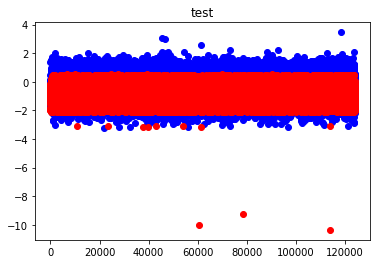

In [375]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return




plotGraph(y_test_M['PMV'],pmv_list,"test")